In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
#importing the classes I need for different models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [3]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [4]:
from sklearn.model_selection import train_test_split
y_train = train.label
X_train = train.loc[:, train.columns != 'label']

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 20

In [12]:
train_df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_df = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

In [13]:
train_data.shape

(42000, 785)

In [14]:
x_train = train_data[:,1:]/255
y_train = train_data[:,0]
x_test= test_data[:]/255

x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

In [15]:
image_rows = 28
image_cols = 28
batch_size = 4096
image_shape = (image_rows,image_cols,1) 

In [16]:
print(x_train.shape)
print(x_test.shape)

(33600, 784)
(28000, 784)


In [17]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_train.shape

(33600, 28, 28, 1)

In [18]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [19]:

cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(10,activation = 'softmax')
    
])

cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

/opt/conda/lib/python3.7/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [20]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=4096,
    epochs=75,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

Epoch 1/75
9/9 [==============================] - 11s 1s/step - loss: 1.9688 - accuracy: 0.4527 - val_loss: 1.4541 - val_accuracy: 0.6275
Epoch 2/75
9/9 [==============================] - 11s 1s/step - loss: 1.1571 - accuracy: 0.7066 - val_loss: 0.7967 - val_accuracy: 0.7961
Epoch 3/75
9/9 [==============================] - 10s 1s/step - loss: 0.6577 - accuracy: 0.8245 - val_loss: 0.5150 - val_accuracy: 0.8545
Epoch 4/75
9/9 [==============================] - 10s 1s/step - loss: 0.4577 - accuracy: 0.8677 - val_loss: 0.3981 - val_accuracy: 0.8835
Epoch 5/75
9/9 [==============================] - 11s 1s/step - loss: 0.3714 - accuracy: 0.8925 - val_loss: 0.3454 - val_accuracy: 0.8994
Epoch 6/75
9/9 [==============================] - 10s 1s/step - loss: 0.3275 - accuracy: 0.9056 - val_loss: 0.3045 - val_accuracy: 0.9104
Epoch 7/75
9/9 [==============================] - 10s 1s/step - loss: 0.2956 - accuracy: 0.9153 - val_loss: 0.2826 - val_accuracy: 0.9179
Epoch 8/75
9/9 [==================

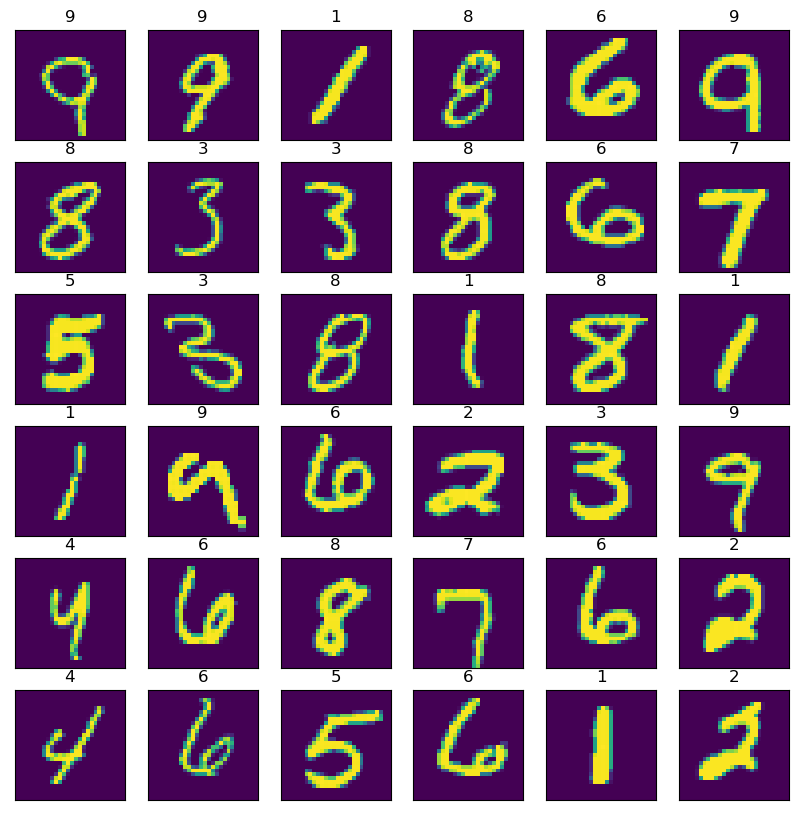

In [21]:
import matplotlib.pyplot as plt

class_names = [str(i) for i in range(10)]
plt.figure(figsize=(10, 10))
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    label_index = int(y_train[i])
    plt.title(class_names[label_index])
plt.show()

In [22]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 1.0, 'Train - Accuracy')

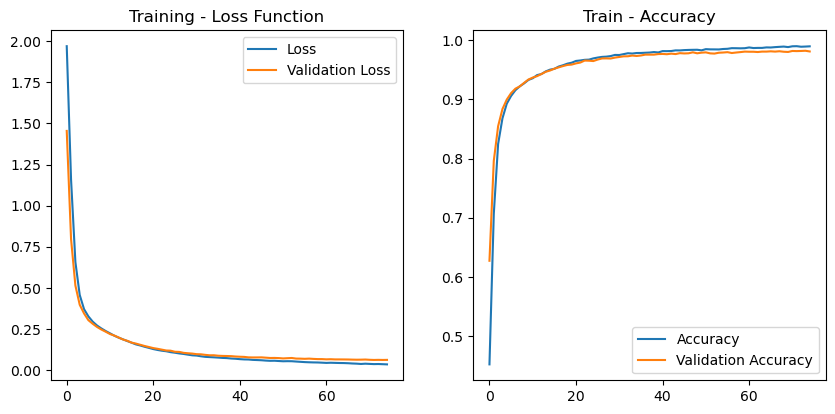

In [23]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

In [24]:
cnn_array = cnn_model.predict(x_test)

875/875 [==============================] - 3s 3ms/step


In [25]:
cnn_label_array = [np.argmax(cnn_array[i]) for i in range(len(cnn_array))]

In [26]:
cnn_output_df = pd.DataFrame()
cnn_output_df['Label'] = cnn_label_array
cnn_output_df.index +=1
cnn_output_df.index.name = "ImageId"
cnn_output_df.to_csv('/kaggle/working/submission.csv')